In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
sampling_seed=0
size_4_training=78786
size_4_training_0=198738
size_4_training_1=78786
epoch_4_test=60
img_size=50
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [5]:

os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  
os.mkdir('./History')

In [5]:
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='C:\\2023train_seg\\'
validation_dir='C:\\2023val_seg\\'
#train_dir='../working/data/train_seg/'  
#test_dir = '../working/data/test_seg/normal'  
test_dir = 'C:\\2023\\test_seg\\'   

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('D:\\WorkSpace\\Data\\BHI_dataset\\**\\*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training_0)
class0label=np.zeros(size_4_training_0)
class1sample=random.sample(class1,size_4_training_1)
class1label=np.ones(size_4_training_1)

class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
   
class0train_path='C:\\2023\\train_seg\\idc-minus\\'
class1train_path='C:\\2023\\train_seg\\idc-plus\\'
class0test_path='C:\\2023\\test_seg\\idc-minus\\'
class1test_path='C:\\2023\\test_seg\\idc-plus\\'
class0val_path='C:\\2023\\val_seg\\idc-minus\\'
class1val_path='C:\\2023\\val_seg\\idc-plus\\'

# read_and_save_data(class0train_path,class0sample_train)
# read_and_save_data(class1train_path,class1sample_train)


# read_and_save_data(class0test_path,class0sample_test)
# read_and_save_data(class1test_path,class1sample_test)


# read_and_save_data(class0val_path,class0sample_val)
# read_and_save_data(class1val_path,class1sample_val)

['D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1001_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1051_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1101_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1151_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1201_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1251_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1301_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1351_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1501_class0.png', 'D:\\WorkSpace\\Data\\BHI_dataset\\10253\\0\\10253_idx5_x1001_y1551_class0.png']
139116
17887
41735
55150
7091
16545


In [6]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [7]:
import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(length):
    #    print(combined_label[i])



    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(224,224,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)

(147314, 50, 50, 3)
(24396, 50, 50, 3)
(55272, 50, 50, 3)


In [8]:
'''
import numpy as np


class0_array = readImage(class0path, 0)
class1_array = readImage(class1path, 1)

class0_array=np.array(class0_array)
class1_array=np.array(class1_array)
combined_data = np.concatenate((class0_array, class1_array))
random.seed(41)
random.shuffle(combined_data)
print(class0_array.shape)
print(class1_array.shape)

X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)
#print(X.shape)
#print(y.shape)

# reshape X data
train_data = np.array(X).reshape(training_reshape)
train_label=np.array(y)
print(y[19990:19999])
print(train_data.shape)
print(train_label.shape)
'''

'\nimport numpy as np\n\n\nclass0_array = readImage(class0path, 0)\nclass1_array = readImage(class1path, 1)\n\nclass0_array=np.array(class0_array)\nclass1_array=np.array(class1_array)\ncombined_data = np.concatenate((class0_array, class1_array))\nrandom.seed(41)\nrandom.shuffle(combined_data)\nprint(class0_array.shape)\nprint(class1_array.shape)\n\nX = []\ny = []\n\nfor features,label in combined_data:\n    X.append(features)\n    y.append(label)\n#print(X.shape)\n#print(y.shape)\n\n# reshape X data\ntrain_data = np.array(X).reshape(training_reshape)\ntrain_label=np.array(y)\nprint(y[19990:19999])\nprint(train_data.shape)\nprint(train_label.shape)\n'

In [9]:
'''
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)
train_label.shape, train_data.shape
'''

'\nlabel_normal = np.zeros(len(normal))\nlabel_bacterial = np.ones(len(bacterial))\nlabel_viral = np.full(len(viral),2, dtype = int)\ntrain_data = np.concatenate((normal,bacterial,viral),axis=0)\ntrain_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)\ntrain_label.shape, train_data.shape\n'

In [10]:
'''
#!pip install sklearn
from sklearn.model_selection import train_test_split
train_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)
val_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)
'''

'\n#!pip install sklearn\nfrom sklearn.model_selection import train_test_split\ntrain_data, test1_data, train_label, test1_label = train_test_split(train_data, train_label, test_size=0.3, random_state=42)\nval_data, test_data, val_label, test_label = train_test_split(test1_data, test1_label, test_size=0.3, random_state=42)\n'

In [11]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [12]:
import matplotlib.pyplot as plt

### Normal

In [13]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [14]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [15]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [16]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [17]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [18]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [19]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [20]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [21]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [22]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [23]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [24]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [25]:
from tensorflow.keras.optimizers import Adam

In [26]:
#Network:
  
def Network128(input_shape, nb_class, depth):
  xin = Input(shape= input_shape)

  x = Conv2D(16, kernel_size = (5,5), strides= (1,1), padding = 'same', activation='relu')(xin)
  x = BatchNormalization()(x)

  x = Conv2D(32, kernel_size = (3,3), strides= (2,2), padding = 'same', activation='relu')(x)
  x = BatchNormalization()(x)
  
##Max Dilation rate will be vary in the range (1,5). 

# Max Dilation rate is 5 for tensor (64x64x32)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=32, max_dilation=5)


# Max Dilation rate is 4 for (32x32x64)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=64, max_dilation=4)

# Max Dilation rate is 3 for (16x16x128)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3, number_of_units=depth)
  x = Shifter_Unit(input_tensor=x, nb_of_input_channels=128, max_dilation=3)

# Max Dilation rate is 2 for (8x8x256)
  x = Residual_Unit(input_tensor=x, nb_of_input_channels=256, max_dilation=2, number_of_units=depth)

  x = GlobalAveragePooling2D()(x)
  #x = GlobalMaxPooling2D()(x)

  x = Dense(128, activation='relu')(x)
  x = Dense(64, activation='relu')(x)

  x = Dense(nb_class, activation= 'softmax')(x)

  model = Model(xin, x)

  model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 1e-4), metrics = ['accuracy'])

  return model

# Custom Callback

In [27]:
# plot confusion matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas.util.testing as tm
from sklearn import metrics
import seaborn as sns
sns.set()

plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=False)
    if save == True:
      plt.savefig('Confusion Matrix.png', dpi = 900)

In [28]:
# test model performance
from datetime import datetime
import matplotlib.pyplot as plt


def test_model(model, test_generator, y_test, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_original>0.5).astype('int')

    y_pred = np.argmax(y_pred_original, axis = 1)
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    
    return


from keras.callbacks import Callback
class MyLogger(Callback):
  
  def __init__(self, test_generator, y_test, class_labels):
    super(MyLogger, self).__init__()
    self.test_generator = test_generator
    self.y_test = y_test
    self.class_labels = class_labels
    
  def on_epoch_end(self, epoch, logs=None):
    test_model(self.model, self.test_generator, self.y_test, self.class_labels)

In [29]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):
    
    # BS = 16
    results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
    
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred_test
    y_test = y_test.astype(int) # sparse form not categorical
    

    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    print('---------------------')
    print('| Balanced Accuracy  |')
    print('---------------------')
    print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred_test, digits=6)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(6,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    plt.show()
    

    
    # add the trained  model to the results
    results['model'] = model
    print("calculate other score")
    print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

# One Hot Encoding the labels

# ImageDataGenerator

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import *


#train_datagen2 = ImageDataGenerator(rescale = 1/255)

train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.1,
                                  rotation_range = 20)

val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val2_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow(train_data,
                                     train_label, 
                                     batch_size = 16, 
                                     shuffle = False)

val_generator = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)
val2_generator = val_datagen.flow(val_data,
                                 val_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [31]:
#get the first patch for visualization
images, labels = train_generator.next()

In [32]:
#get the augmented data
#train_data1=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
train_label1=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
#print(train_data1.shape)
print(train_label1.shape)
#print(y)

(147314, 2)


100%|██████████| 3/3 [00:00<00:00, 237.18it/s]


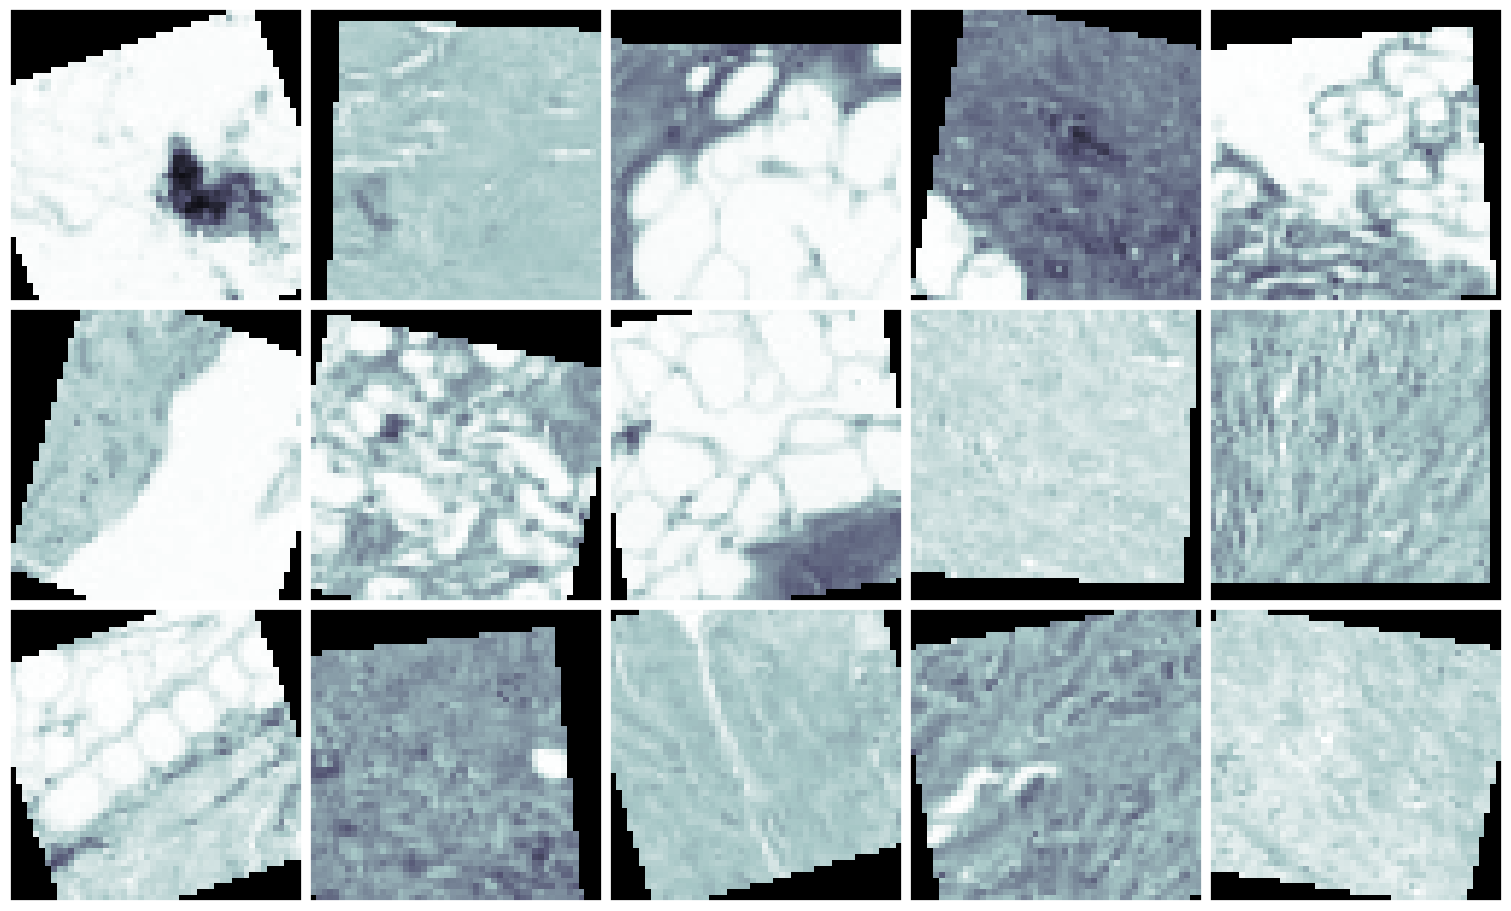

In [33]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [34]:
#os.mkdir('Model')


In [35]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'best_model_multiclass_128_second.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('C:\\2023\\History\\Multiclass_Log_128_second.csv')

    return [callback1 ,callback2, callback3]

# Training

In [36]:
model = Network128(input_shape = (img_size, img_size, 3), nb_class = 2, depth = 5)
model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50, 50, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 50, 50, 16)   1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 50, 50, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 25, 25, 32)   4640        batch_normalization[0][0]        
______________________________________________________________________________________________

# Plotting Model

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


load weight success
Epoch 1/60
9207/9207 [==============================] - 1508s 162ms/step - loss: 0.1740 - accuracy: 0.9292 - val_loss: 0.2487 - val_accuracy: 0.9047

Epoch 00001: val_accuracy improved from -inf to 0.90473, saving model to best_model_multiclass_128_second.h5
Predicting test data
1525/1525 [==============================] - 57s 36ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:56.624417


---------------------
| Balanced Accuracy  |
---------------------

    0.8974054222482579


---------------------
|      Accuracy      |
---------------------

    0.9046974913920315


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950780  0.914268  0.932166     17473
           1   0.802739  0.880543  0.839843      6923

    accuracy                       0.904697     24396
   macro avg   0.876759  0.897405  0.886005     24396
weighted avg   0.908769  0.904697  0.905967     2439

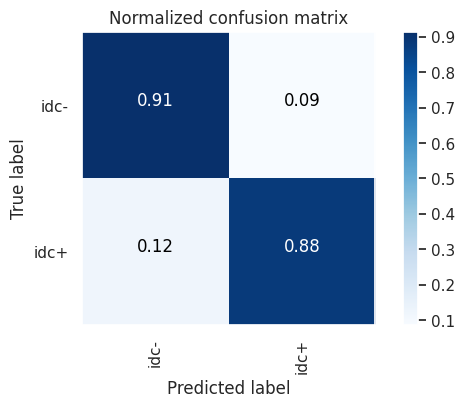

Epoch 2/60
9207/9207 [==============================] - 1499s 163ms/step - loss: 0.1674 - accuracy: 0.9312 - val_loss: 0.2735 - val_accuracy: 0.9035

Epoch 00002: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 52s 34ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.249708


---------------------
| Balanced Accuracy  |
---------------------

    0.898712335349546


---------------------
|      Accuracy      |
---------------------

    0.9035087719298246


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.953343  0.909804  0.931065     17473
           1   0.795881  0.887621  0.839252      6923

    accuracy                       0.903509     24396
   macro avg   0.874612  0.898712  0.885158     24396
weighted avg   0.908659  0.903509  0.905010     24396

--------------------
| Confusion Matrix |
--------------------

 [[15897

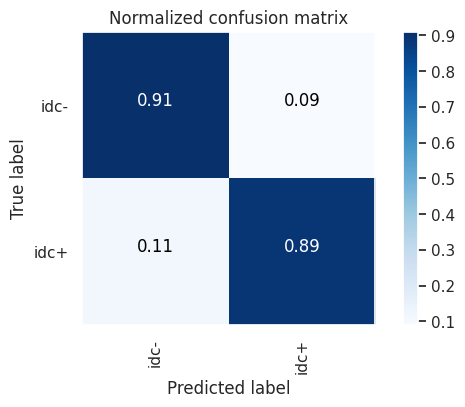

Epoch 3/60
9207/9207 [==============================] - 1436s 156ms/step - loss: 0.1641 - accuracy: 0.9333 - val_loss: 0.5180 - val_accuracy: 0.9019

Epoch 00003: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 52s 34ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:52.502136


---------------------
| Balanced Accuracy  |
---------------------

    0.8916657150874299


---------------------
|      Accuracy      |
---------------------

    0.9019101492047876


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945943  0.915355  0.930398     17473
           1   0.802484  0.867976  0.833946      6923

    accuracy                       0.901910     24396
   macro avg   0.874213  0.891666  0.882172     24396
weighted avg   0.905233  0.901910  0.903027     24396

--------------------
| Confusion Matrix |
--------------------

 [[1599

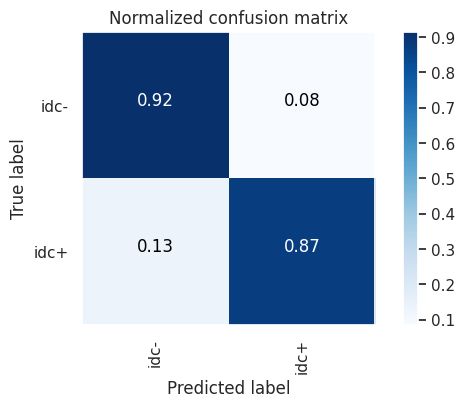

Epoch 4/60
9207/9207 [==============================] - 1505s 163ms/step - loss: 0.1629 - accuracy: 0.9340 - val_loss: 0.8823 - val_accuracy: 0.9027

Epoch 00004: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 47s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:46.773087


---------------------
| Balanced Accuracy  |
---------------------

    0.8953491472148453


---------------------
|      Accuracy      |
---------------------

    0.9026889654041647


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949830  0.912322  0.930698     17473
           1   0.798765  0.878376  0.836681      6923

    accuracy                       0.902689     24396
   macro avg   0.874298  0.895349  0.883690     24396
weighted avg   0.906962  0.902689  0.904019     24396

--------------------
| Confusion Matrix |
--------------------

 [[1594

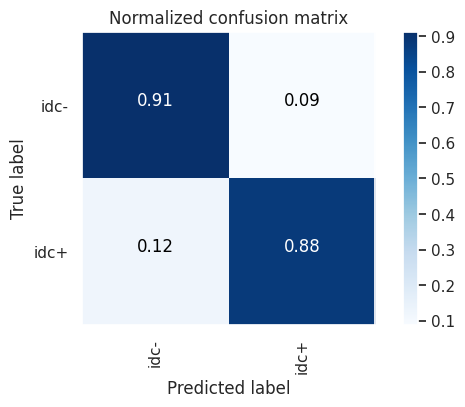

Epoch 5/60
9207/9207 [==============================] - 1288s 140ms/step - loss: 0.1609 - accuracy: 0.9342 - val_loss: 1.1254 - val_accuracy: 0.8991

Epoch 00005: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.962373


---------------------
| Balanced Accuracy  |
---------------------

    0.8955496298661952


---------------------
|      Accuracy      |
---------------------

    0.8990408263649778


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.952982  0.903623  0.927646     17473
           1   0.784875  0.887477  0.833028      6923

    accuracy                       0.899041     24396
   macro avg   0.868928  0.895550  0.880337     24396
weighted avg   0.905277  0.899041  0.900796     24396

--------------------
| Confusion Matrix |
--------------------

 [[1578

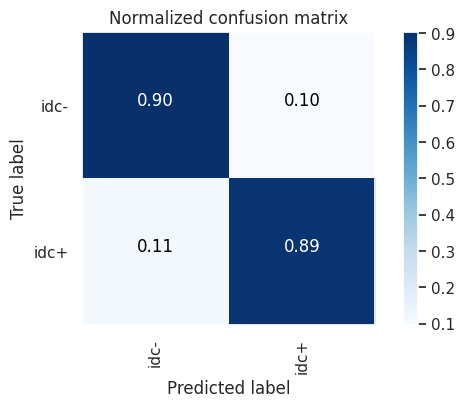

Epoch 6/60
9207/9207 [==============================] - 1125s 122ms/step - loss: 0.1601 - accuracy: 0.9353 - val_loss: 0.5094 - val_accuracy: 0.9015

Epoch 00006: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.023156


---------------------
| Balanced Accuracy  |
---------------------

    0.8944620642868993


---------------------
|      Accuracy      |
---------------------

    0.9014182652893917


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949737  0.910548  0.929730     17473
           1   0.795526  0.878376  0.834901      6923

    accuracy                       0.901418     24396
   macro avg   0.872632  0.894462  0.882315     24396
weighted avg   0.905976  0.901418  0.902820     24396

--------------------
| Confusion Matrix |
--------------------

 [[1591

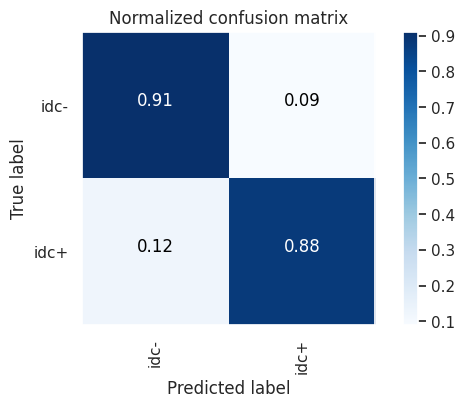

Epoch 7/60
9207/9207 [==============================] - 1318s 143ms/step - loss: 0.1581 - accuracy: 0.9354 - val_loss: 0.4378 - val_accuracy: 0.9033

Epoch 00007: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 57s 38ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:57.426090


---------------------
| Balanced Accuracy  |
---------------------

    0.896694137263626


---------------------
|      Accuracy      |
---------------------

    0.9033038202984096


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951003  0.911978  0.931082     17473
           1   0.798691  0.881410  0.838014      6923

    accuracy                       0.903304     24396
   macro avg   0.874847  0.896694  0.884548     24396
weighted avg   0.907780  0.903304  0.904671     24396

--------------------
| Confusion Matrix |
--------------------

 [[15935

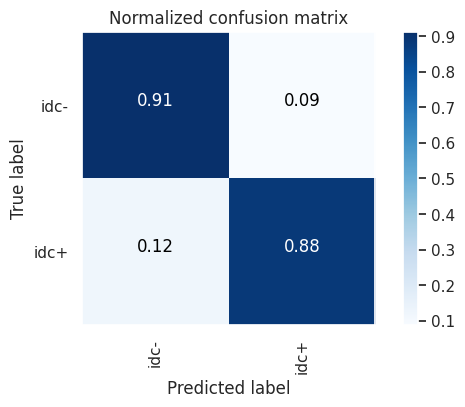

Epoch 8/60
9207/9207 [==============================] - 1372s 149ms/step - loss: 0.1560 - accuracy: 0.9363 - val_loss: 0.3029 - val_accuracy: 0.9041

Epoch 00008: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 47s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:46.643954


---------------------
| Balanced Accuracy  |
---------------------

    0.8927898737210194


---------------------
|      Accuracy      |
---------------------

    0.9040826364977865


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945639  0.918903  0.932079     17473
           1   0.808952  0.866676  0.836820      6923

    accuracy                       0.904083     24396
   macro avg   0.877296  0.892790  0.884450     24396
weighted avg   0.906850  0.904083  0.905047     24396

--------------------
| Confusion Matrix |
--------------------

 [[1605

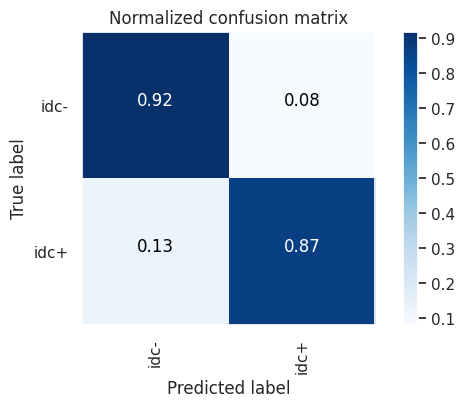

Epoch 9/60
9207/9207 [==============================] - 1335s 145ms/step - loss: 0.1561 - accuracy: 0.9365 - val_loss: 2.3240 - val_accuracy: 0.9011

Epoch 00009: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 49s 32ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:49.411381


---------------------
| Balanced Accuracy  |
---------------------

    0.8934631974935614


---------------------
|      Accuracy      |
---------------------

    0.9010493523528448


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948799  0.911006  0.929518     17473
           1   0.795905  0.875921  0.833998      6923

    accuracy                       0.901049     24396
   macro avg   0.872352  0.893463  0.881758     24396
weighted avg   0.905411  0.901049  0.902412     24396

--------------------
| Confusion Matrix |
--------------------

 [[1591

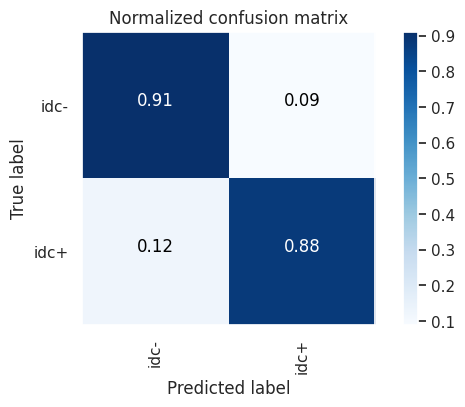

Epoch 10/60
9207/9207 [==============================] - 1308s 142ms/step - loss: 0.1544 - accuracy: 0.9374 - val_loss: 4.4933 - val_accuracy: 0.9011

Epoch 00010: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 46s 30ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:45.585818


---------------------
| Balanced Accuracy  |
---------------------

    0.8941173091892529


---------------------
|      Accuracy      |
---------------------

    0.9010493523528448


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949603  0.910147  0.929456     17473
           1   0.794744  0.878088  0.834340      6923

    accuracy                       0.901049     24396
   macro avg   0.872174  0.894117  0.881898     24396
weighted avg   0.905658  0.901049  0.902465     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

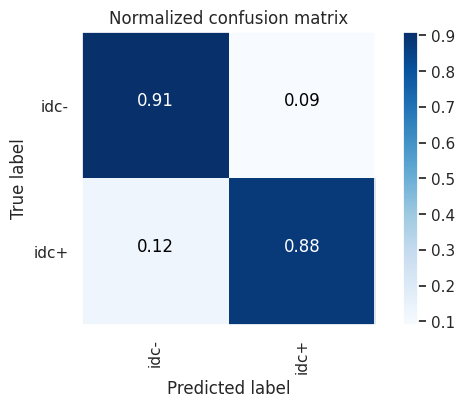

Epoch 11/60
9207/9207 [==============================] - 1311s 142ms/step - loss: 0.1535 - accuracy: 0.9375 - val_loss: 2.9910 - val_accuracy: 0.8993

Epoch 00011: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 55s 36ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:55.322789


---------------------
| Balanced Accuracy  |
---------------------

    0.8942100545808986


---------------------
|      Accuracy      |
---------------------

    0.8992457779963928


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951145  0.905855  0.927947     17473
           1   0.787879  0.882565  0.832538      6923

    accuracy                       0.899246     24396
   macro avg   0.869512  0.894210  0.880243     24396
weighted avg   0.904814  0.899246  0.900873     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

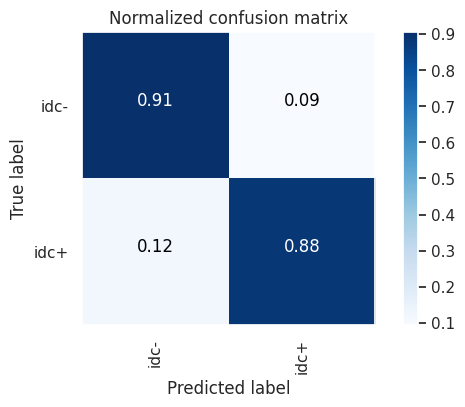

Epoch 12/60
9207/9207 [==============================] - 1400s 152ms/step - loss: 0.1520 - accuracy: 0.9382 - val_loss: 3.1157 - val_accuracy: 0.8954

Epoch 00012: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 55s 36ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:55.026196


---------------------
| Balanced Accuracy  |
---------------------

    0.8918254423433959


---------------------
|      Accuracy      |
---------------------

    0.8953926873257911


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951249  0.900074  0.924954     17473
           1   0.777947  0.883576  0.827404      6923

    accuracy                       0.895393     24396
   macro avg   0.864598  0.891825  0.876179     24396
weighted avg   0.902070  0.895393  0.897272     24396

--------------------
| Confusion Matrix |
--------------------

 [[157

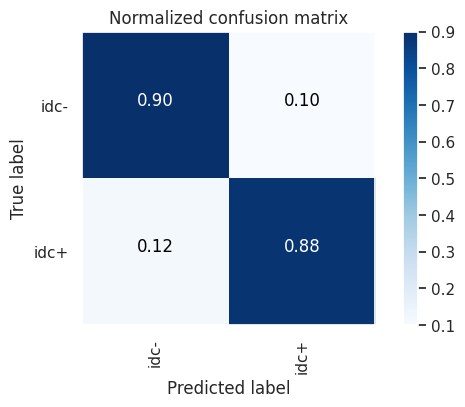

Epoch 13/60
9207/9207 [==============================] - 1394s 151ms/step - loss: 0.1506 - accuracy: 0.9385 - val_loss: 4.9962 - val_accuracy: 0.8969

Epoch 00013: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 54s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:54.045296


---------------------
| Balanced Accuracy  |
---------------------

    0.8947457152253204


---------------------
|      Accuracy      |
---------------------

    0.896827348745696


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.953762  0.899559  0.925868     17473
           1   0.778297  0.889932  0.830379      6923

    accuracy                       0.896827     24396
   macro avg   0.866030  0.894746  0.878124     24396
weighted avg   0.903969  0.896827  0.898771     24396

--------------------
| Confusion Matrix |
--------------------

 [[1571

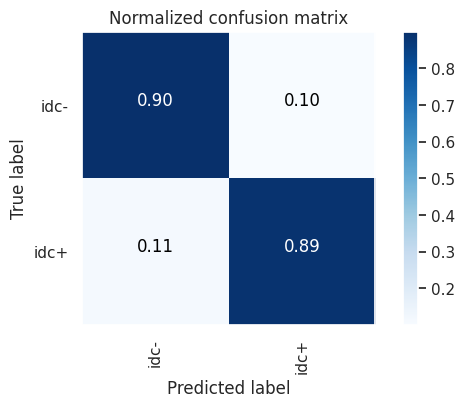

Epoch 14/60
9207/9207 [==============================] - 1218s 132ms/step - loss: 0.1504 - accuracy: 0.9387 - val_loss: 6.2650 - val_accuracy: 0.8955

Epoch 00014: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 54s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:53.974961


---------------------
| Balanced Accuracy  |
---------------------

    0.8942088600262064


---------------------
|      Accuracy      |
---------------------

    0.8954336776520742


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.954219  0.897041  0.924747     17473
           1   0.774279  0.891377  0.828711      6923

    accuracy                       0.895434     24396
   macro avg   0.864249  0.894209  0.876729     24396
weighted avg   0.903156  0.895434  0.897494     24396

--------------------
| Confusion Matrix |
--------------------

 [[156

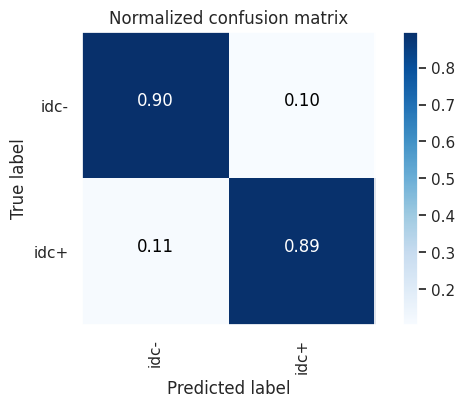

Epoch 15/60
9207/9207 [==============================] - 1219s 132ms/step - loss: 0.1495 - accuracy: 0.9395 - val_loss: 9.7193 - val_accuracy: 0.8983

Epoch 00015: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 53s 35ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:53.501465


---------------------
| Balanced Accuracy  |
---------------------

    0.8919820282098596


---------------------
|      Accuracy      |
---------------------

    0.8983030004918839


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949131  0.906599  0.927378     17473
           1   0.788217  0.877365  0.830405      6923

    accuracy                       0.898303     24396
   macro avg   0.868674  0.891982  0.878891     24396
weighted avg   0.903468  0.898303  0.899859     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

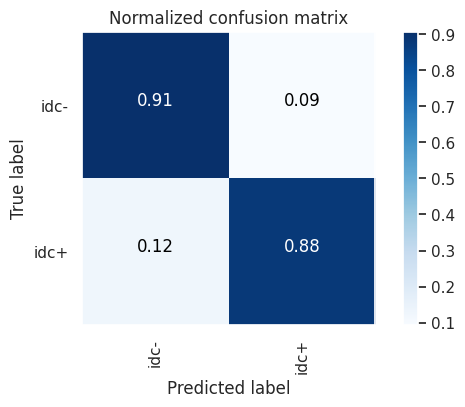

Epoch 16/60
9207/9207 [==============================] - 1174s 128ms/step - loss: 0.1485 - accuracy: 0.9395 - val_loss: 4.2997 - val_accuracy: 0.9012

Epoch 00016: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.912791


---------------------
| Balanced Accuracy  |
---------------------

    0.8908889899993783


---------------------
|      Accuracy      |
---------------------

    0.9011723233316937


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945569  0.914668  0.929862     17473
           1   0.801041  0.867110  0.832767      6923

    accuracy                       0.901172     24396
   macro avg   0.873305  0.890889  0.881314     24396
weighted avg   0.904555  0.901172  0.902309     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

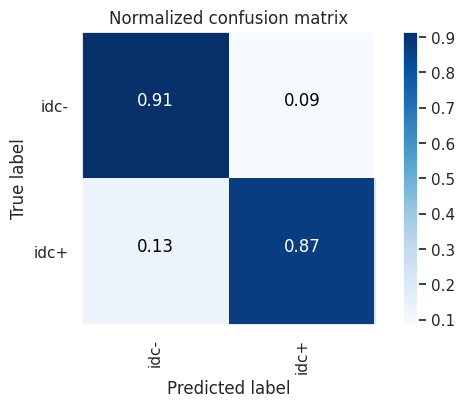

Epoch 17/60
9207/9207 [==============================] - 1202s 131ms/step - loss: 0.1474 - accuracy: 0.9398 - val_loss: 0.9222 - val_accuracy: 0.9001

Epoch 00017: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 57s 37ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:56.930914


---------------------
| Balanced Accuracy  |
---------------------

    0.8944621221546007


---------------------
|      Accuracy      |
---------------------

    0.9001065748483358


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950773  0.907514  0.928640     17473
           1   0.790619  0.881410  0.833550      6923

    accuracy                       0.900107     24396
   macro avg   0.870696  0.894462  0.881095     24396
weighted avg   0.905326  0.900107  0.901656     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

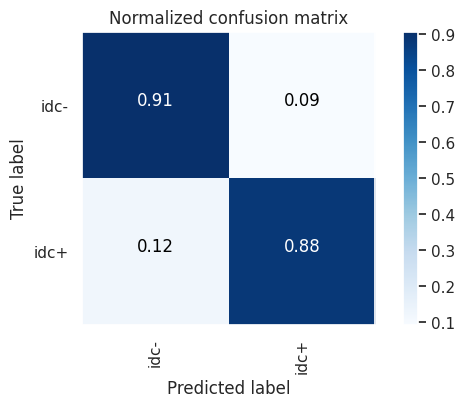

Epoch 18/60
9207/9207 [==============================] - 1395s 152ms/step - loss: 0.1476 - accuracy: 0.9398 - val_loss: 0.3156 - val_accuracy: 0.9042

Epoch 00018: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 56s 37ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:55.845200


---------------------
| Balanced Accuracy  |
---------------------

    0.8931673488703757


---------------------
|      Accuracy      |
---------------------

    0.9041236268240695


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946062  0.918503  0.932079     17473
           1   0.808396  0.867832  0.837060      6923

    accuracy                       0.904124     24396
   macro avg   0.877229  0.893167  0.884570     24396
weighted avg   0.906996  0.904124  0.905115     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

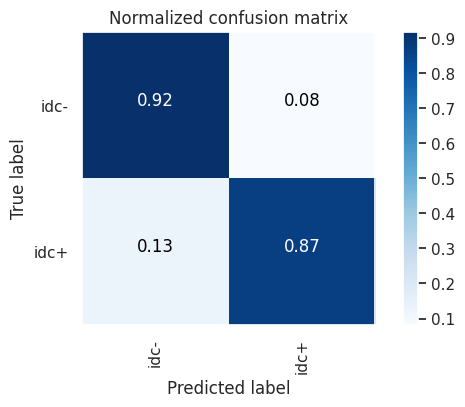

Epoch 19/60
9207/9207 [==============================] - 1365s 148ms/step - loss: 0.1462 - accuracy: 0.9411 - val_loss: 0.3364 - val_accuracy: 0.9003

Epoch 00019: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 57s 37ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:57.201595


---------------------
| Balanced Accuracy  |
---------------------

    0.8961900599839232


---------------------
|      Accuracy      |
---------------------

    0.9002705361534677


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.952794  0.905626  0.928611     17473
           1   0.788264  0.886754  0.834614      6923

    accuracy                       0.900271     24396
   macro avg   0.870529  0.896190  0.881612     24396
weighted avg   0.906104  0.900271  0.901937     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

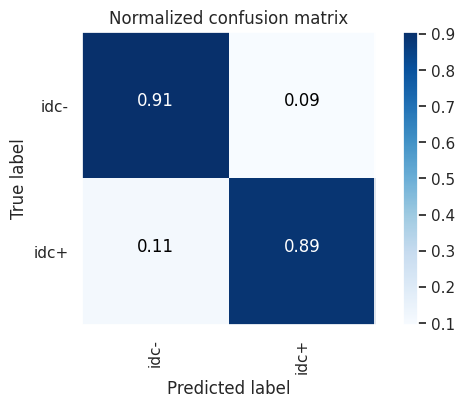

Epoch 20/60
9207/9207 [==============================] - 1344s 146ms/step - loss: 0.1464 - accuracy: 0.9405 - val_loss: 0.3817 - val_accuracy: 0.9033

Epoch 00020: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 55s 36ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:55.507467


---------------------
| Balanced Accuracy  |
---------------------

    0.8918537107155086


---------------------
|      Accuracy      |
---------------------

    0.9033038202984096


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945105  0.918331  0.931526     17473
           1   0.807630  0.865376  0.835507      6923

    accuracy                       0.903304     24396
   macro avg   0.876368  0.891854  0.883516     24396
weighted avg   0.906093  0.903304  0.904278     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

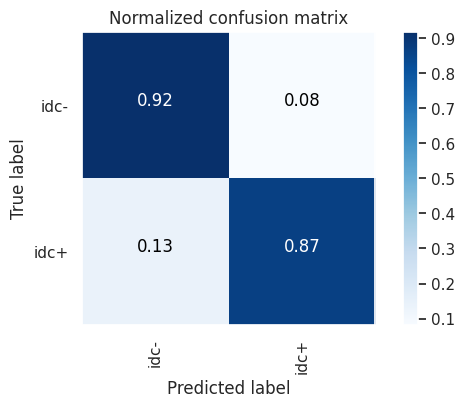

Epoch 21/60
9207/9207 [==============================] - 1361s 148ms/step - loss: 0.1435 - accuracy: 0.9418 - val_loss: 0.4539 - val_accuracy: 0.9024

Epoch 00021: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 60s 39ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:01:00.061720


---------------------
| Balanced Accuracy  |
---------------------

    0.8883024690850279


---------------------
|      Accuracy      |
---------------------

    0.9024020331201836


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.941545  0.920907  0.931111     17473
           1   0.810840  0.855698  0.832666      6923

    accuracy                       0.902402     24396
   macro avg   0.876193  0.888302  0.881888     24396
weighted avg   0.904454  0.902402  0.903175     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

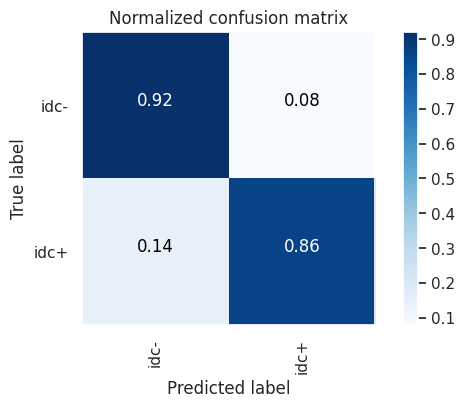

Epoch 22/60
9207/9207 [==============================] - 1363s 148ms/step - loss: 0.1431 - accuracy: 0.9419 - val_loss: 0.3965 - val_accuracy: 0.9018

Epoch 00022: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 59s 39ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:59.207137


---------------------
| Balanced Accuracy  |
---------------------

    0.8958970055440316


---------------------
|      Accuracy      |
---------------------

    0.9017871782259387


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951218  0.909518  0.929901     17473
           1   0.794382  0.882276  0.836025      6923

    accuracy                       0.901787     24396
   macro avg   0.872800  0.895897  0.882963     24396
weighted avg   0.906712  0.901787  0.903261     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

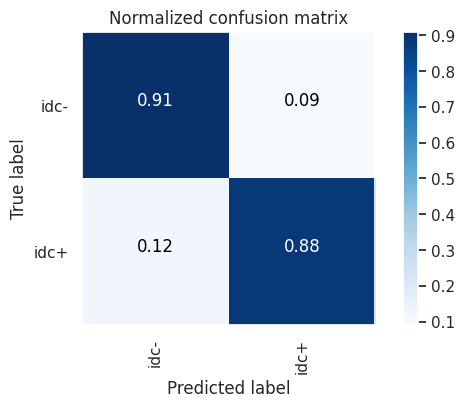

Epoch 23/60
9207/9207 [==============================] - 1316s 143ms/step - loss: 0.1442 - accuracy: 0.9414 - val_loss: 1.8962 - val_accuracy: 0.8996

Epoch 00023: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 46s 30ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:45.865180


---------------------
| Balanced Accuracy  |
---------------------

    0.8936976526190148


---------------------
|      Accuracy      |
---------------------

    0.8995737006066569


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950249  0.907286  0.928270     17473
           1   0.789965  0.880110  0.832605      6923

    accuracy                       0.899574     24396
   macro avg   0.870107  0.893698  0.880437     24396
weighted avg   0.904764  0.899574  0.901123     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

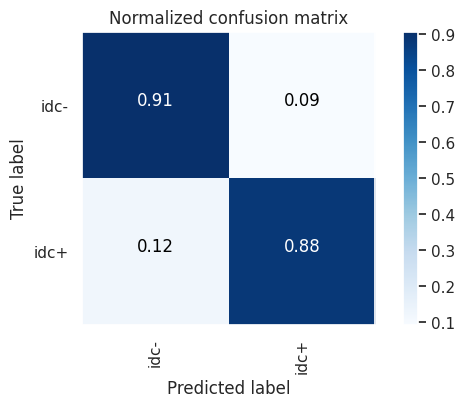

Epoch 24/60
9207/9207 [==============================] - 1300s 141ms/step - loss: 0.1428 - accuracy: 0.9424 - val_loss: 1.0002 - val_accuracy: 0.9032

Epoch 00024: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 46s 30ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:46.382210


---------------------
| Balanced Accuracy  |
---------------------

    0.8924219756762377


---------------------
|      Accuracy      |
---------------------

    0.9031808493195606


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945884  0.917301  0.931373     17473
           1   0.806066  0.867543  0.835676      6923

    accuracy                       0.903181     24396
   macro avg   0.875975  0.892422  0.883524     24396
weighted avg   0.906207  0.903181  0.904216     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

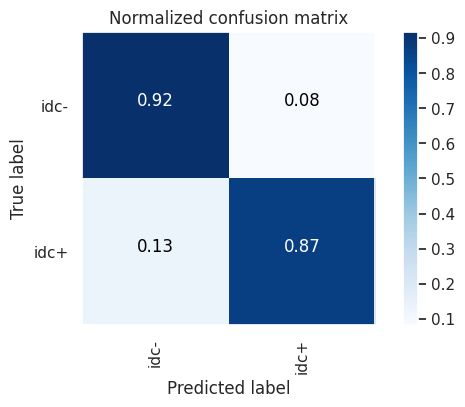

Epoch 25/60
9207/9207 [==============================] - 1313s 143ms/step - loss: 0.1421 - accuracy: 0.9421 - val_loss: 1.3645 - val_accuracy: 0.9045

Epoch 00025: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 47s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:47.493750


---------------------
| Balanced Accuracy  |
---------------------

    0.8948203273594053


---------------------
|      Accuracy      |
---------------------

    0.9044925397606165


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947779  0.917187  0.932232     17473
           1   0.806732  0.872454  0.838307      6923

    accuracy                       0.904493     24396
   macro avg   0.877255  0.894820  0.885269     24396
weighted avg   0.907753  0.904493  0.905578     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

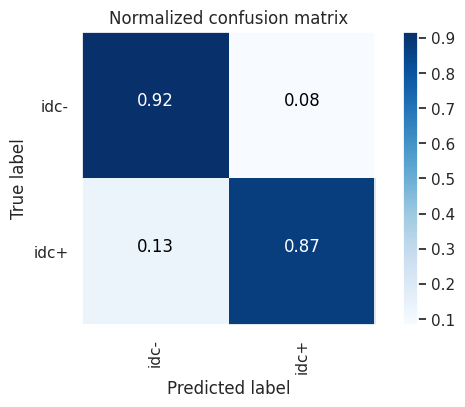

Epoch 26/60
9207/9207 [==============================] - 1317s 143ms/step - loss: 0.1409 - accuracy: 0.9428 - val_loss: 0.8439 - val_accuracy: 0.9026

Epoch 00026: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 47s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:46.893777


---------------------
| Balanced Accuracy  |
---------------------

    0.8964843089785071


---------------------
|      Accuracy      |
---------------------

    0.9025659944253156


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951327  0.910548  0.930491     17473
           1   0.796272  0.882421  0.837136      6923

    accuracy                       0.902566     24396
   macro avg   0.873800  0.896484  0.883813     24396
weighted avg   0.907326  0.902566  0.903999     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

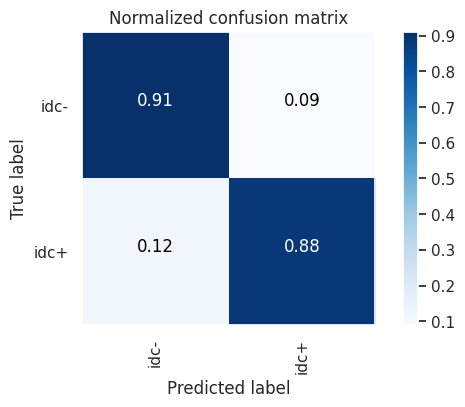

Epoch 27/60
9207/9207 [==============================] - 1297s 141ms/step - loss: 0.1402 - accuracy: 0.9426 - val_loss: 1.6333 - val_accuracy: 0.9019

Epoch 00027: val_accuracy did not improve from 0.90473
Predicting test data
1525/1525 [==============================] - 47s 31ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:47.229027


---------------------
| Balanced Accuracy  |
---------------------

    0.8941377158207956


---------------------
|      Accuracy      |
---------------------

    0.9018281685522217


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949017  0.911921  0.930100     17473
           1   0.797660  0.876354  0.835157      6923

    accuracy                       0.901828     24396
   macro avg   0.873339  0.894138  0.882628     24396
weighted avg   0.906066  0.901828  0.903157     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

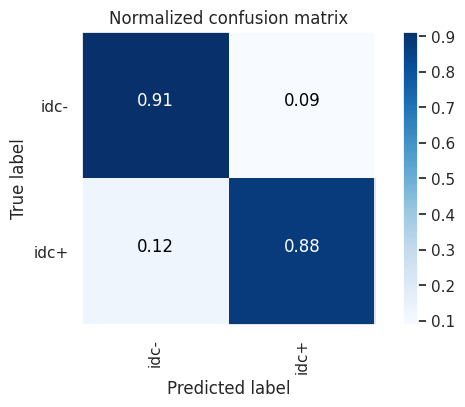

Epoch 28/60
9207/9207 [==============================] - 1121s 122ms/step - loss: 0.1402 - accuracy: 0.9431 - val_loss: 1.5810 - val_accuracy: 0.9053

Epoch 00028: val_accuracy improved from 0.90473 to 0.90535, saving model to best_model_multiclass_128_second.h5
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:38.144427


---------------------
| Balanced Accuracy  |
---------------------

    0.8930378368213324


---------------------
|      Accuracy      |
---------------------

    0.9053123462862764


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945002  0.921422  0.933063     17473
           1   0.813426  0.864654  0.838258      6923

    accuracy                       0.905312     24396
   macro avg   0.879214  0.893038  0.885660     24396
weighted avg   0.907664  0.905312  0.906160     24396

-------------

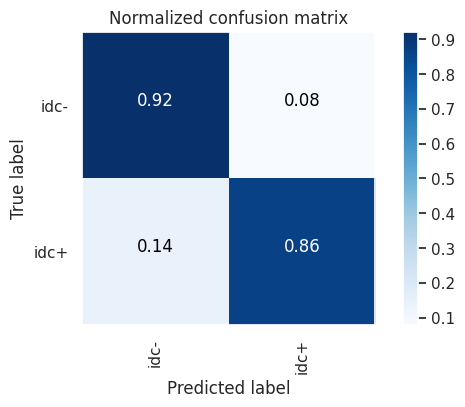

Epoch 29/60
9207/9207 [==============================] - 1114s 121ms/step - loss: 0.1384 - accuracy: 0.9434 - val_loss: 2.2779 - val_accuracy: 0.9026

Epoch 00029: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.836480


---------------------
| Balanced Accuracy  |
---------------------

    0.8951324781407445


---------------------
|      Accuracy      |
---------------------

    0.9025659944253156


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949660  0.912322  0.930617     17473
           1   0.798686  0.877943  0.836441      6923

    accuracy                       0.902566     24396
   macro avg   0.874173  0.895132  0.883529     24396
weighted avg   0.906817  0.902566  0.903892     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

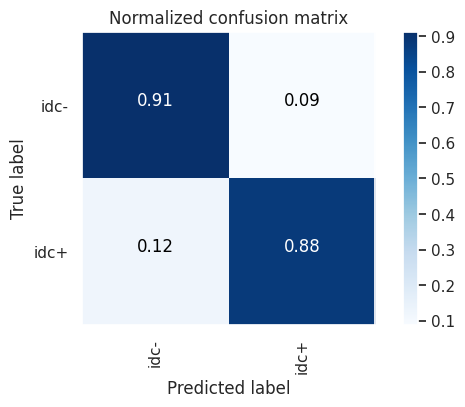

Epoch 30/60
9207/9207 [==============================] - 1115s 121ms/step - loss: 0.1381 - accuracy: 0.9434 - val_loss: 2.3851 - val_accuracy: 0.9038

Epoch 00030: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.907516


---------------------
| Balanced Accuracy  |
---------------------

    0.8913249487277699


---------------------
|      Accuracy      |
---------------------

    0.9037957042138055


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944099  0.920163  0.931977     17473
           1   0.810616  0.862487  0.835748      6923

    accuracy                       0.903796     24396
   macro avg   0.877357  0.891325  0.883862     24396
weighted avg   0.906220  0.903796  0.904669     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

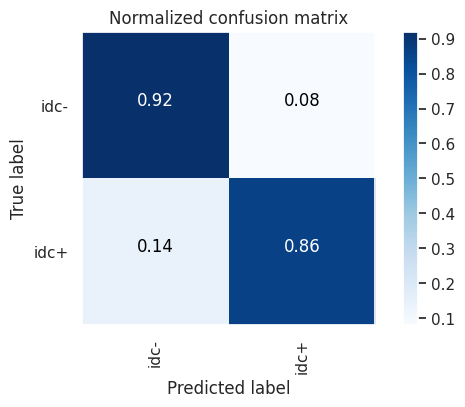

Epoch 31/60
9207/9207 [==============================] - 1104s 120ms/step - loss: 0.1372 - accuracy: 0.9442 - val_loss: 4.4324 - val_accuracy: 0.9036

Epoch 00031: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.595651


---------------------
| Balanced Accuracy  |
---------------------

    0.8888992917563765


---------------------
|      Accuracy      |
---------------------

    0.9036317429086735


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.941338  0.922967  0.932062     17473
           1   0.814703  0.854832  0.834285      6923

    accuracy                       0.903632     24396
   macro avg   0.878020  0.888899  0.883173     24396
weighted avg   0.905402  0.903632  0.904315     24396

--------------------
| Confusion Matrix |
--------------------

 [[161

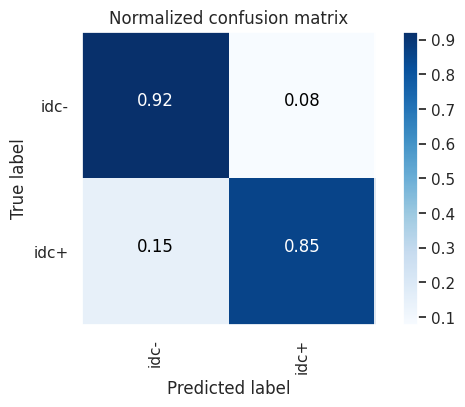

Epoch 32/60
9207/9207 [==============================] - 1111s 121ms/step - loss: 0.1381 - accuracy: 0.9441 - val_loss: 3.5806 - val_accuracy: 0.9010

Epoch 00032: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.670311


---------------------
| Balanced Accuracy  |
---------------------

    0.8945247680747265


---------------------
|      Accuracy      |
---------------------

    0.9010083620265618


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950138  0.909518  0.929384     17473
           1   0.793872  0.879532  0.834510      6923

    accuracy                       0.901008     24396
   macro avg   0.872005  0.894525  0.881947     24396
weighted avg   0.905793  0.901008  0.902461     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

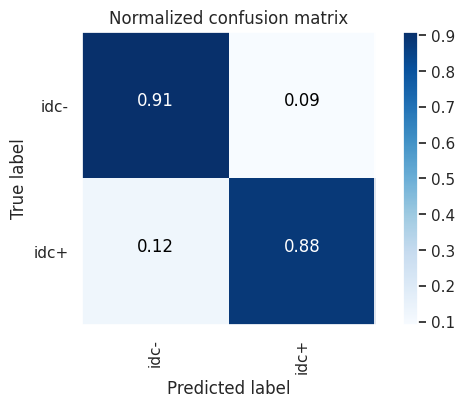

Epoch 33/60
9207/9207 [==============================] - 1105s 120ms/step - loss: 0.1374 - accuracy: 0.9438 - val_loss: 3.0316 - val_accuracy: 0.9011

Epoch 00033: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.705334


---------------------
| Balanced Accuracy  |
---------------------

    0.8902798539078625


---------------------
|      Accuracy      |
---------------------

    0.9010493523528448


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944927  0.915183  0.929817     17473
           1   0.801686  0.865376  0.832315      6923

    accuracy                       0.901049     24396
   macro avg   0.873307  0.890280  0.881066     24396
weighted avg   0.904279  0.901049  0.902148     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

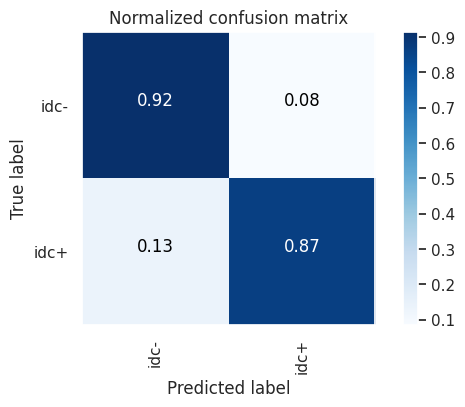

Epoch 34/60
9207/9207 [==============================] - 1105s 120ms/step - loss: 0.1364 - accuracy: 0.9450 - val_loss: 1.7498 - val_accuracy: 0.9001

Epoch 00034: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.531315


---------------------
| Balanced Accuracy  |
---------------------

    0.888546501315056


---------------------
|      Accuracy      |
---------------------

    0.9000655845220528


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943589  0.915183  0.929169     17473
           1   0.801047  0.861910  0.830365      6923

    accuracy                       0.900066     24396
   macro avg   0.872318  0.888547  0.879767     24396
weighted avg   0.903139  0.900066  0.901131     24396

--------------------
| Confusion Matrix |
--------------------

 [[1599

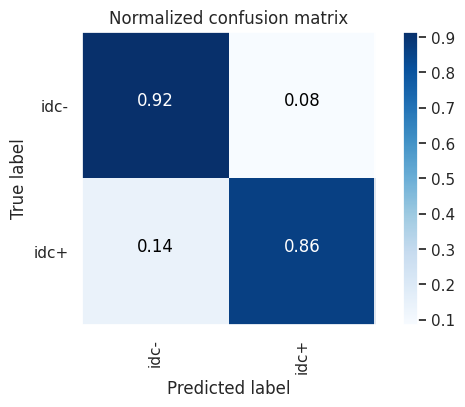

Epoch 35/60
9207/9207 [==============================] - 1109s 120ms/step - loss: 0.1346 - accuracy: 0.9457 - val_loss: 1.2358 - val_accuracy: 0.9031

Epoch 00035: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.571414


---------------------
| Balanced Accuracy  |
---------------------

    0.8920594923949399


---------------------
|      Accuracy      |
---------------------

    0.9030988686669946


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945509  0.917587  0.931339     17473
           1   0.806426  0.866532  0.835399      6923

    accuracy                       0.903099     24396
   macro avg   0.875967  0.892059  0.883369     24396
weighted avg   0.906041  0.903099  0.904113     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

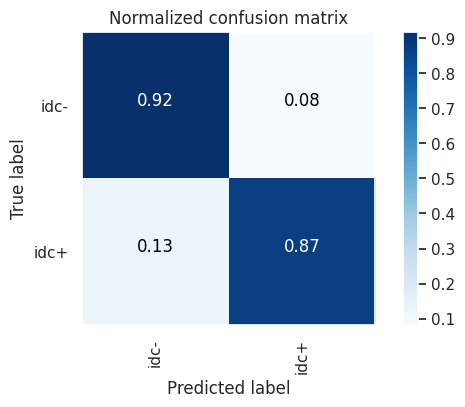

Epoch 36/60
9207/9207 [==============================] - 1123s 122ms/step - loss: 0.1334 - accuracy: 0.9456 - val_loss: 1.3507 - val_accuracy: 0.9015

Epoch 00036: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.586148


---------------------
| Balanced Accuracy  |
---------------------

    0.892296683835986


---------------------
|      Accuracy      |
---------------------

    0.9013772749631087


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947119  0.913295  0.929899     17473
           1   0.799258  0.871299  0.833725      6923

    accuracy                       0.901377     24396
   macro avg   0.873188  0.892297  0.881812     24396
weighted avg   0.905159  0.901377  0.902607     24396

--------------------
| Confusion Matrix |
--------------------

 [[1595

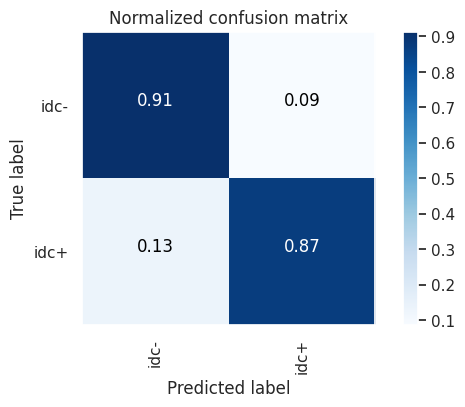

Epoch 37/60
9207/9207 [==============================] - 1123s 122ms/step - loss: 0.1331 - accuracy: 0.9458 - val_loss: 2.0662 - val_accuracy: 0.9032

Epoch 00037: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.547831


---------------------
| Balanced Accuracy  |
---------------------

    0.8896024835296328


---------------------
|      Accuracy      |
---------------------

    0.9031398589932775


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.942537  0.920907  0.931596     17473
           1   0.811305  0.858298  0.834141      6923

    accuracy                       0.903140     24396
   macro avg   0.876921  0.889602  0.882868     24396
weighted avg   0.905297  0.903140  0.903941     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

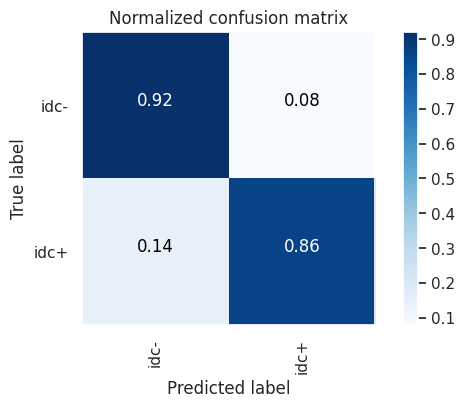

Epoch 38/60
9207/9207 [==============================] - 1122s 122ms/step - loss: 0.1332 - accuracy: 0.9461 - val_loss: 1.3630 - val_accuracy: 0.9011

Epoch 00038: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.670709


---------------------
| Balanced Accuracy  |
---------------------

    0.8938120570645969


---------------------
|      Accuracy      |
---------------------

    0.9010493523528448


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949227  0.910548  0.929485     17473
           1   0.795285  0.877076  0.834181      6923

    accuracy                       0.901049     24396
   macro avg   0.872256  0.893812  0.881833     24396
weighted avg   0.905542  0.901049  0.902440     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

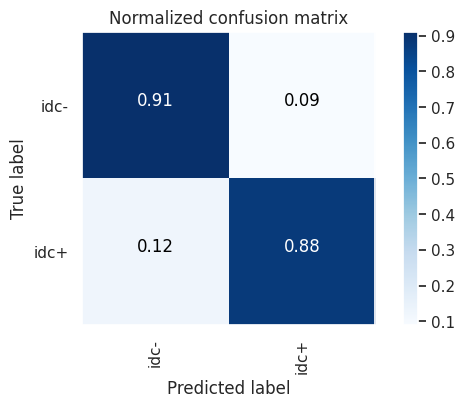

Epoch 39/60
9207/9207 [==============================] - 1123s 122ms/step - loss: 0.1320 - accuracy: 0.9464 - val_loss: 2.3247 - val_accuracy: 0.9049

Epoch 00039: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.605196


---------------------
| Balanced Accuracy  |
---------------------

    0.894598185654119


---------------------
|      Accuracy      |
---------------------

    0.9048614526971634


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947226  0.918331  0.932555     17473
           1   0.808611  0.870865  0.838584      6923

    accuracy                       0.904861     24396
   macro avg   0.877918  0.894598  0.885569     24396
weighted avg   0.907890  0.904861  0.905888     24396

--------------------
| Confusion Matrix |
--------------------

 [[1604

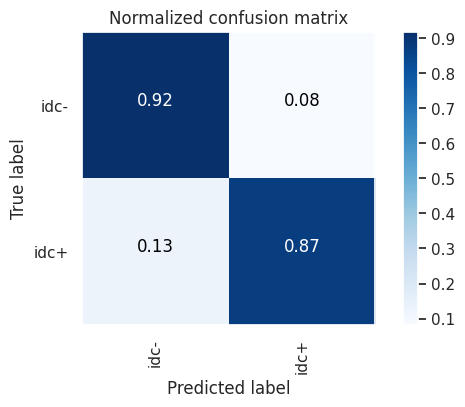

Epoch 40/60
9207/9207 [==============================] - 1115s 121ms/step - loss: 0.1308 - accuracy: 0.9475 - val_loss: 2.7571 - val_accuracy: 0.9025

Epoch 00040: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.632874


---------------------
| Balanced Accuracy  |
---------------------

    0.8944647427347907


---------------------
|      Accuracy      |
---------------------

    0.9024840137727497


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948906  0.913009  0.930611     17473
           1   0.799578  0.875921  0.836010      6923

    accuracy                       0.902484     24396
   macro avg   0.874242  0.894465  0.883311     24396
weighted avg   0.906530  0.902484  0.903766     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

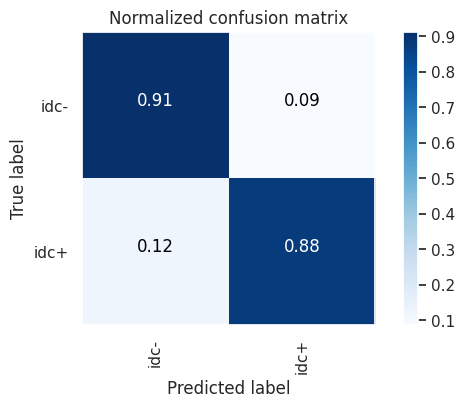

Epoch 41/60
9207/9207 [==============================] - 1103s 120ms/step - loss: 0.1306 - accuracy: 0.9465 - val_loss: 1.8431 - val_accuracy: 0.9040

Epoch 00041: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.723213


---------------------
| Balanced Accuracy  |
---------------------

    0.8918018943223509


---------------------
|      Accuracy      |
---------------------

    0.9040416461715035


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944484  0.920105  0.932135     17473
           1   0.810686  0.863498  0.836259      6923

    accuracy                       0.904042     24396
   macro avg   0.877585  0.891802  0.884197     24396
weighted avg   0.906515  0.904042  0.904928     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

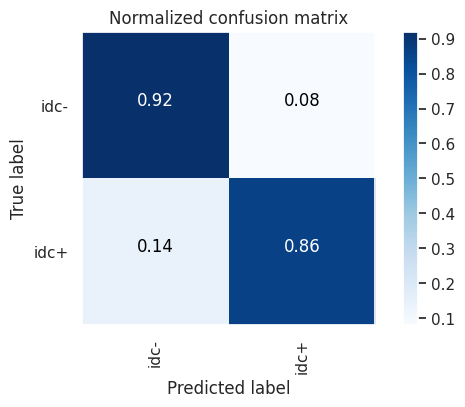

Epoch 42/60
9207/9207 [==============================] - 1103s 120ms/step - loss: 0.1314 - accuracy: 0.9467 - val_loss: 3.8930 - val_accuracy: 0.9019

Epoch 00042: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.869439


---------------------
| Balanced Accuracy  |
---------------------

    0.8936280501745046


---------------------
|      Accuracy      |
---------------------

    0.9019101492047876


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948329  0.912780  0.930215     17473
           1   0.798892  0.874476  0.834977      6923

    accuracy                       0.901910     24396
   macro avg   0.873610  0.893628  0.882596     24396
weighted avg   0.905922  0.901910  0.903189     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

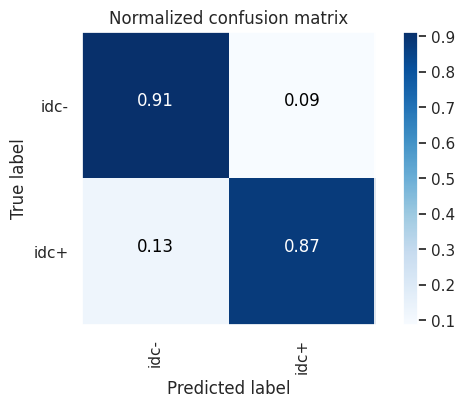

Epoch 43/60
9207/9207 [==============================] - 1110s 121ms/step - loss: 0.1291 - accuracy: 0.9476 - val_loss: 2.0488 - val_accuracy: 0.9012

Epoch 00043: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.605522


---------------------
| Balanced Accuracy  |
---------------------

    0.8933310069966267


---------------------
|      Accuracy      |
---------------------

    0.9011723233316937


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948541  0.911463  0.929633     17473
           1   0.796608  0.875199  0.834056      6923

    accuracy                       0.901172     24396
   macro avg   0.872574  0.893331  0.881844     24396
weighted avg   0.905426  0.901172  0.902510     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

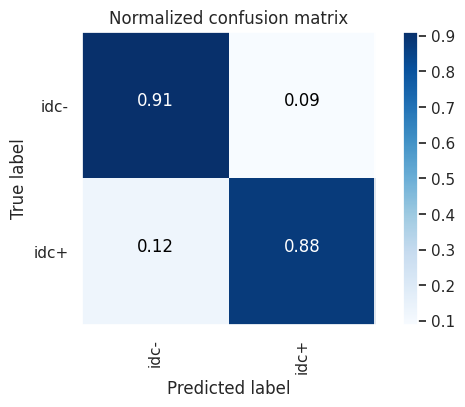

Epoch 44/60
9207/9207 [==============================] - 1123s 122ms/step - loss: 0.1309 - accuracy: 0.9467 - val_loss: 2.8905 - val_accuracy: 0.9041

Epoch 00044: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.611180


---------------------
| Balanced Accuracy  |
---------------------

    0.8937928449877465


---------------------
|      Accuracy      |
---------------------

    0.9040826364977865


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946849  0.917587  0.931989     17473
           1   0.807048  0.869999  0.837342      6923

    accuracy                       0.904083     24396
   macro avg   0.876949  0.893793  0.884665     24396
weighted avg   0.907177  0.904083  0.905130     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

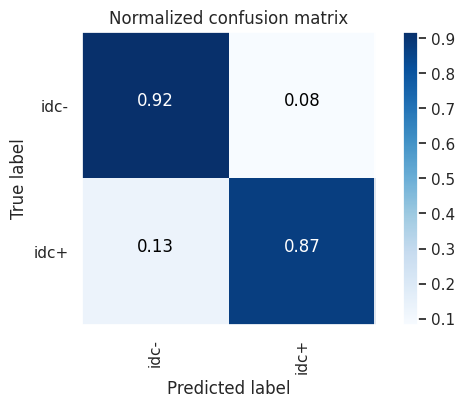

Epoch 45/60
9207/9207 [==============================] - 1121s 122ms/step - loss: 0.1279 - accuracy: 0.9488 - val_loss: 2.8896 - val_accuracy: 0.8988

Epoch 00045: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.655542


---------------------
| Balanced Accuracy  |
---------------------

    0.8913374357510412


---------------------
|      Accuracy      |
---------------------

    0.8987538940809969


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947984  0.908487  0.927816     17473
           1   0.791008  0.874187  0.830520      6923

    accuracy                       0.898754     24396
   macro avg   0.869496  0.891337  0.879168     24396
weighted avg   0.903438  0.898754  0.900206     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

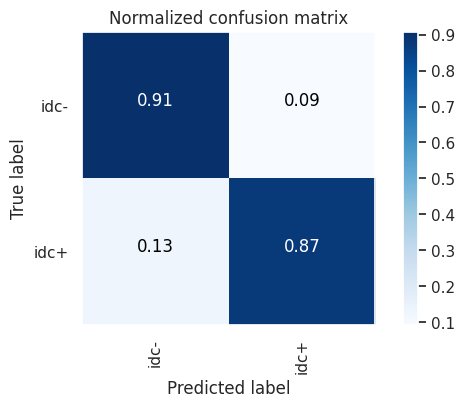

Epoch 46/60
9207/9207 [==============================] - 1118s 121ms/step - loss: 0.1275 - accuracy: 0.9478 - val_loss: 2.7238 - val_accuracy: 0.9028

Epoch 00046: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.863821


---------------------
| Balanced Accuracy  |
---------------------

    0.8904923606408729


---------------------
|      Accuracy      |
---------------------

    0.9028529267092966


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943814  0.919075  0.931280     17473
           1   0.808427  0.861910  0.834312      6923

    accuracy                       0.902853     24396
   macro avg   0.876121  0.890492  0.882796     24396
weighted avg   0.905395  0.902853  0.903763     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

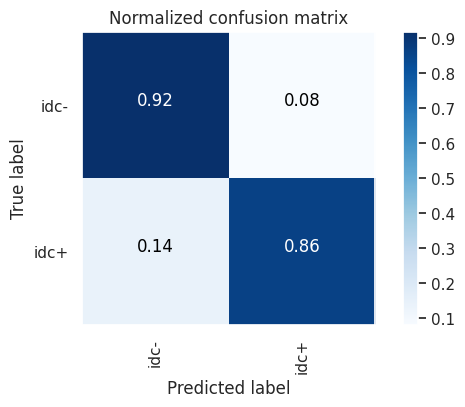

Epoch 47/60
9207/9207 [==============================] - 1103s 120ms/step - loss: 0.1270 - accuracy: 0.9491 - val_loss: 3.4161 - val_accuracy: 0.9004

Epoch 00047: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.697569


---------------------
| Balanced Accuracy  |
---------------------

    0.8885860042880462


---------------------
|      Accuracy      |
---------------------

    0.9004344974585998


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943357  0.915985  0.929469     17473
           1   0.802423  0.861187  0.830767      6923

    accuracy                       0.900434     24396
   macro avg   0.872890  0.888586  0.880118     24396
weighted avg   0.903363  0.900434  0.901460     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

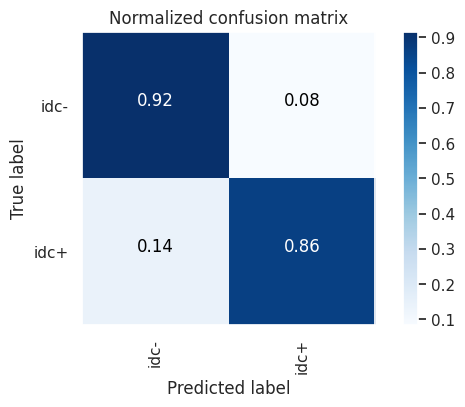

Epoch 48/60
9207/9207 [==============================] - 1102s 120ms/step - loss: 0.1283 - accuracy: 0.9476 - val_loss: 2.6441 - val_accuracy: 0.9039

Epoch 00048: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.648957


---------------------
| Balanced Accuracy  |
---------------------

    0.8915852252482501


---------------------
|      Accuracy      |
---------------------

    0.9039186751926546


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944317  0.920105  0.932054     17473
           1   0.810609  0.863065  0.836015      6923

    accuracy                       0.903919     24396
   macro avg   0.877463  0.891585  0.884035     24396
weighted avg   0.906374  0.903919  0.904800     24396

--------------------
| Confusion Matrix |
--------------------

 [[160

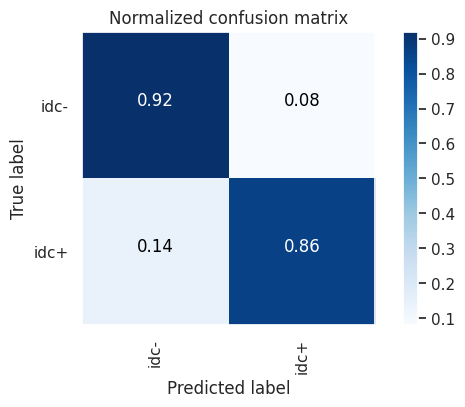

Epoch 49/60
9207/9207 [==============================] - 1103s 120ms/step - loss: 0.1264 - accuracy: 0.9488 - val_loss: 2.7919 - val_accuracy: 0.9052

Epoch 00049: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.594028


---------------------
| Balanced Accuracy  |
---------------------

    0.8923701014153786


---------------------
|      Accuracy      |
---------------------

    0.9052303656337104


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944265  0.922108  0.933055     17473
           1   0.814401  0.862632  0.837823      6923

    accuracy                       0.905230     24396
   macro avg   0.879333  0.892370  0.885439     24396
weighted avg   0.907413  0.905230  0.906031     24396

--------------------
| Confusion Matrix |
--------------------

 [[161

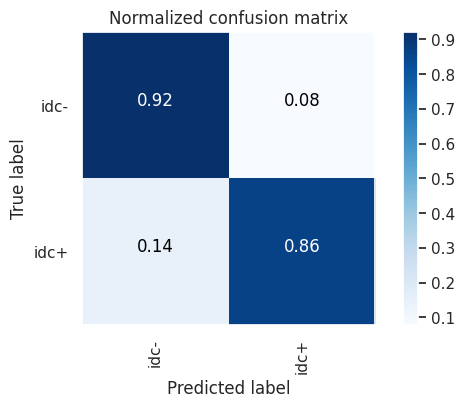

Epoch 50/60
9207/9207 [==============================] - 1120s 122ms/step - loss: 0.1258 - accuracy: 0.9492 - val_loss: 2.9112 - val_accuracy: 0.8995

Epoch 00050: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 37s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.524363


---------------------
| Balanced Accuracy  |
---------------------

    0.8922449831782312


---------------------
|      Accuracy      |
---------------------

    0.8994917199540908


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948522  0.909002  0.928342     17473
           1   0.792184  0.875488  0.831755      6923

    accuracy                       0.899492     24396
   macro avg   0.870353  0.892245  0.880048     24396
weighted avg   0.904157  0.899492  0.900933     24396

--------------------
| Confusion Matrix |
--------------------

 [[158

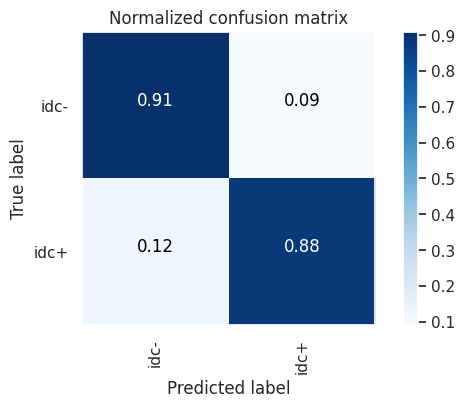

Epoch 51/60
9207/9207 [==============================] - 1121s 122ms/step - loss: 0.1251 - accuracy: 0.9493 - val_loss: 5.5876 - val_accuracy: 0.9017

Epoch 00051: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.519965


---------------------
| Balanced Accuracy  |
---------------------

    0.894444336103248


---------------------
|      Accuracy      |
---------------------

    0.9017051975733726


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949490  0.911234  0.929969     17473
           1   0.796644  0.877654  0.835189      6923

    accuracy                       0.901705     24396
   macro avg   0.873067  0.894444  0.882579     24396
weighted avg   0.906116  0.901705  0.903073     24396

--------------------
| Confusion Matrix |
--------------------

 [[1592

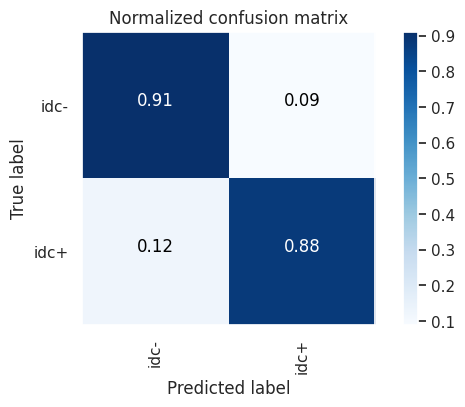

Epoch 52/60
9207/9207 [==============================] - 1121s 122ms/step - loss: 0.1238 - accuracy: 0.9494 - val_loss: 10.2276 - val_accuracy: 0.9017

Epoch 00052: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.559913


---------------------
| Balanced Accuracy  |
---------------------

    0.8924533854378525


---------------------
|      Accuracy      |
---------------------

    0.9016642072470897


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947087  0.913753  0.930121     17473
           1   0.800080  0.871154  0.834106      6923

    accuracy                       0.901664     24396
   macro avg   0.873584  0.892453  0.882113     24396
weighted avg   0.905370  0.901664  0.902874     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

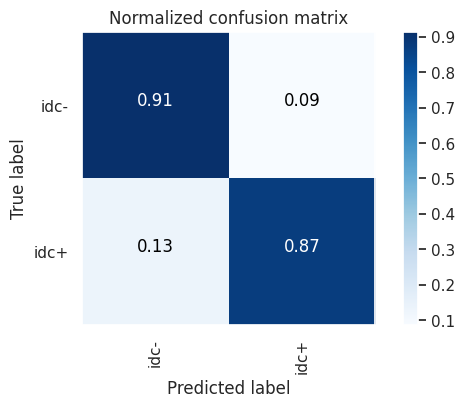

Epoch 53/60
9207/9207 [==============================] - 1104s 120ms/step - loss: 0.1241 - accuracy: 0.9502 - val_loss: 6.1847 - val_accuracy: 0.8975

Epoch 00053: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.729195


---------------------
| Balanced Accuracy  |
---------------------

    0.8942878081044856


---------------------
|      Accuracy      |
---------------------

    0.897483193966224


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.952654  0.901677  0.926465     17473
           1   0.781369  0.886899  0.830796      6923

    accuracy                       0.897483     24396
   macro avg   0.867012  0.894288  0.878631     24396
weighted avg   0.904048  0.897483  0.899316     24396

--------------------
| Confusion Matrix |
--------------------

 [[1575

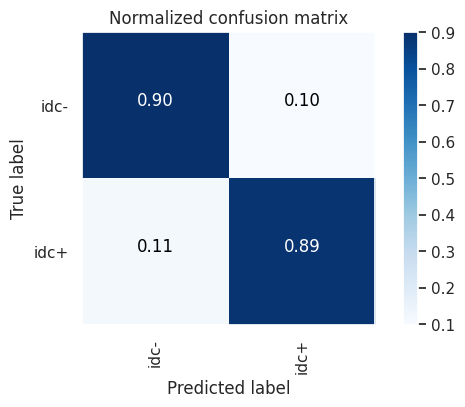

Epoch 54/60
9207/9207 [==============================] - 1102s 120ms/step - loss: 0.1230 - accuracy: 0.9496 - val_loss: 13.1251 - val_accuracy: 0.8991

Epoch 00054: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.636626


---------------------
| Balanced Accuracy  |
---------------------

    0.8938339475893387


---------------------
|      Accuracy      |
---------------------

    0.8990818166912609


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950808  0.905969  0.927847     17473
           1   0.787918  0.881699  0.832175      6923

    accuracy                       0.899082     24396
   macro avg   0.869363  0.893834  0.880011     24396
weighted avg   0.904584  0.899082  0.900698     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

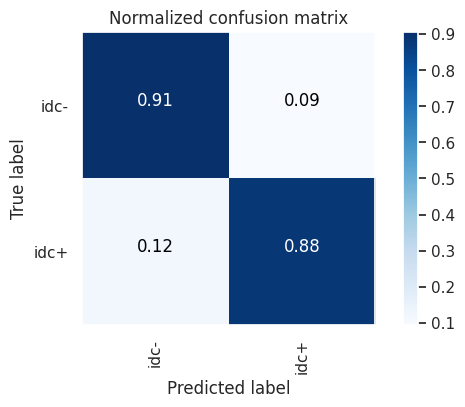

Epoch 55/60
9207/9207 [==============================] - 1103s 120ms/step - loss: 0.1219 - accuracy: 0.9506 - val_loss: 6.7808 - val_accuracy: 0.9010

Epoch 00055: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.814880


---------------------
| Balanced Accuracy  |
---------------------

    0.8936962265935171


---------------------
|      Accuracy      |
---------------------

    0.9010083620265618


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949117  0.910605  0.929462     17473
           1   0.795335  0.876788  0.834078      6923

    accuracy                       0.901008     24396
   macro avg   0.872226  0.893696  0.881770     24396
weighted avg   0.905478  0.901008  0.902394     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

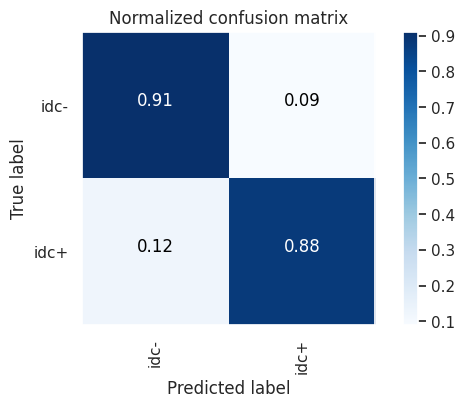

Epoch 56/60
9207/9207 [==============================] - 1117s 121ms/step - loss: 0.1228 - accuracy: 0.9498 - val_loss: 14.3195 - val_accuracy: 0.8964

Epoch 00056: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.580600


---------------------
| Balanced Accuracy  |
---------------------

    0.8884417318417498


---------------------
|      Accuracy      |
---------------------

    0.8964174454828661


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946256  0.906885  0.926152     17473
           1   0.787320  0.869999  0.826597      6923

    accuracy                       0.896417     24396
   macro avg   0.866788  0.888442  0.876375     24396
weighted avg   0.901154  0.896417  0.897901     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

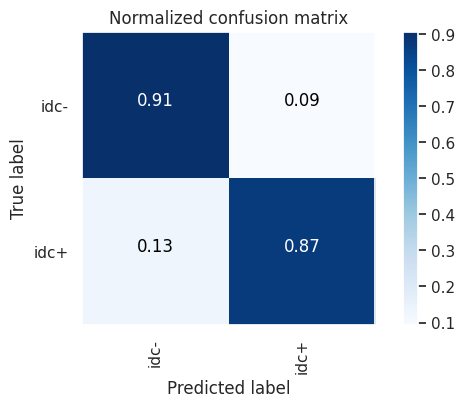

Epoch 57/60
9207/9207 [==============================] - 1121s 122ms/step - loss: 0.1215 - accuracy: 0.9507 - val_loss: 13.3605 - val_accuracy: 0.9005

Epoch 00057: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.553650


---------------------
| Balanced Accuracy  |
---------------------

    0.8939633439029793


---------------------
|      Accuracy      |
---------------------

    0.9005164781111658


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.949833  0.909117  0.929029     17473
           1   0.793014  0.878810  0.833710      6923

    accuracy                       0.900516     24396
   macro avg   0.871423  0.893963  0.881370     24396
weighted avg   0.905331  0.900516  0.901980     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

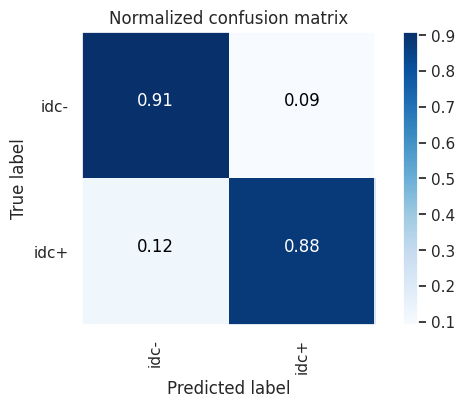

Epoch 58/60
9207/9207 [==============================] - 1121s 122ms/step - loss: 0.1208 - accuracy: 0.9505 - val_loss: 7.7023 - val_accuracy: 0.9019

Epoch 00058: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.626395


---------------------
| Balanced Accuracy  |
---------------------

    0.8938024799600224


---------------------
|      Accuracy      |
---------------------

    0.9019101492047876


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948543  0.912551  0.930199     17473
           1   0.798576  0.875054  0.835068      6923

    accuracy                       0.901910     24396
   macro avg   0.873559  0.893802  0.882633     24396
weighted avg   0.905986  0.901910  0.903203     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

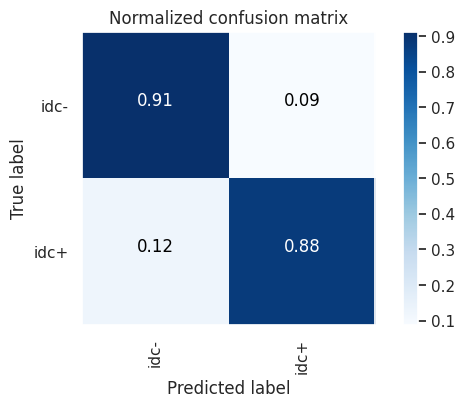

Epoch 59/60
9207/9207 [==============================] - 1108s 120ms/step - loss: 0.1202 - accuracy: 0.9515 - val_loss: 7.6105 - val_accuracy: 0.9006

Epoch 00059: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 38s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.668279


---------------------
| Balanced Accuracy  |
---------------------

    0.8916371573768105


---------------------
|      Accuracy      |
---------------------

    0.9005574684374488


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946949  0.912265  0.929284     17473
           1   0.797303  0.871010  0.832528      6923

    accuracy                       0.900557     24396
   macro avg   0.872126  0.891637  0.880906     24396
weighted avg   0.904483  0.900557  0.901827     24396

--------------------
| Confusion Matrix |
--------------------

 [[159

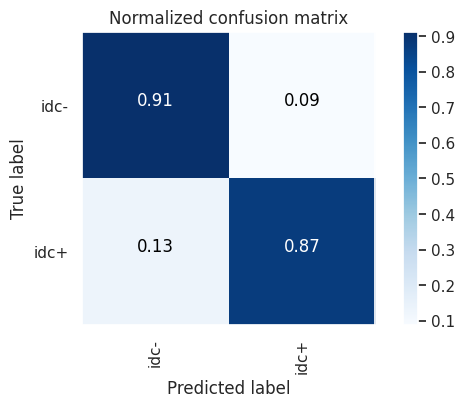

Epoch 60/60
9207/9207 [==============================] - 1102s 120ms/step - loss: 0.1201 - accuracy: 0.9509 - val_loss: 22.6159 - val_accuracy: 0.8990

Epoch 00060: val_accuracy did not improve from 0.90535
Predicting test data
1525/1525 [==============================] - 37s 25ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:00:37.395050


---------------------
| Balanced Accuracy  |
---------------------

    0.8909722161541507


---------------------
|      Accuracy      |
---------------------

    0.8989178553861289


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947409  0.909346  0.927987     17473
           1   0.792262  0.872599  0.830492      6923

    accuracy                       0.898918     24396
   macro avg   0.869836  0.890972  0.879240     24396
weighted avg   0.903382  0.898918  0.900321     24396

--------------------
| Confusion Matrix |
--------------------

 [[15

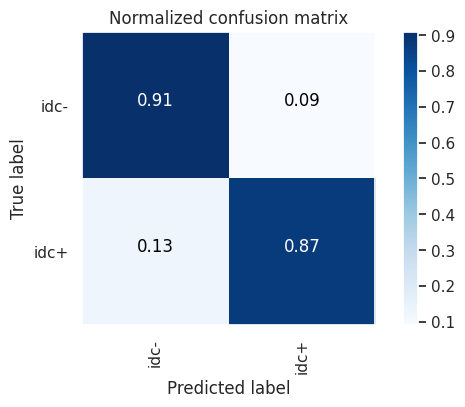

In [38]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''
#from keras.models import load_model
first_model_path="D:\\WorkSpace\\Code\\Python\\Money\\2023-1-3-2\\23covxnet\\best_model_multiclass_128.h5"
model.load_weights(first_model_path)
print("load weight success")
model.trainable=True

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

# Loading Best Model

In [39]:
from keras.models import load_model
#best_model = load_model('./best_model_multiclass_128.h5')
model1 = load_model('best_model_multiclass_128_second.h5', compile=False)

# Best Model Performance
def test_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels, cm_normalize=True, \
                 print_cm=True):

analyse of best model
VAL kappa
0.7739915508455719
analyse 1st model
report of val data
              precision    recall  f1-score   support

           0   0.947655  0.919777  0.933508     39602
           1   0.811286  0.871602  0.840363     15670

    accuracy                       0.906119     55272
   macro avg   0.879470  0.895689  0.886935     55272
weighted avg   0.908993  0.906119  0.907100     55272



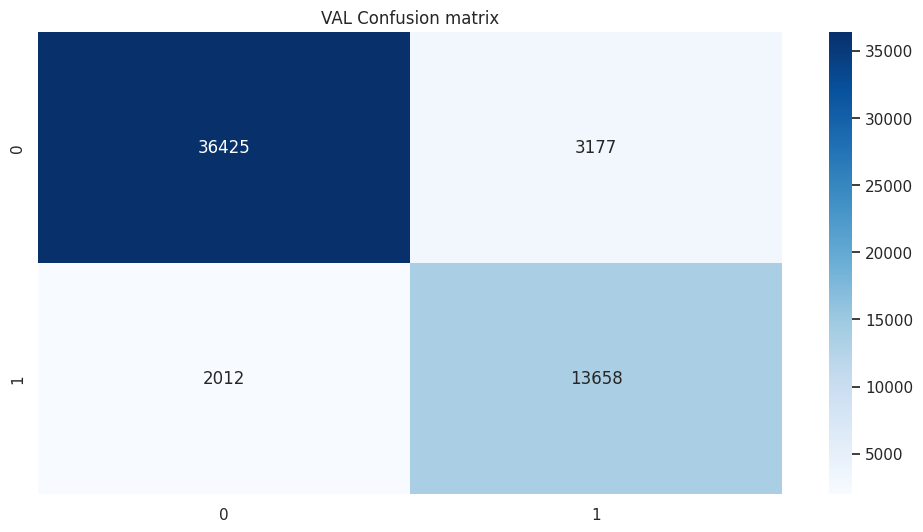

In [40]:
import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
#---------------
from keras.models import load_model

#model1 = load_model('./best_model_multiclass_128.h5', compile=False)
print("analyse of best model")


cf_matrix_val = confusion_matrix(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_val, annot=True, cmap='Blues', fmt='g')
plt.title("VAL Confusion matrix")
# kappa VAL
kappa_val = cohen_kappa_score(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print("VAL kappa")
print(kappa_val)



print("analyse 1st model")
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) , digits=6
)
print(report)

report of test data
              precision    recall  f1-score   support

           0  0.9450021 0.9214216 0.9330629     17473
           1  0.8134257 0.8646541 0.8382579      6923

    accuracy                      0.9053123     24396
   macro avg  0.8792139 0.8930378 0.8856604     24396
weighted avg  0.9076638 0.9053123 0.9061595     24396

TEST kappa
0.7714089927805334


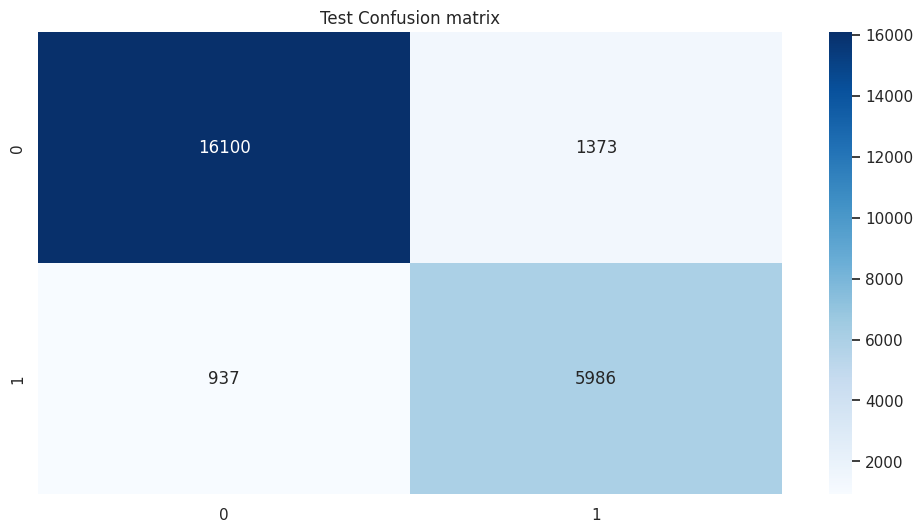

In [41]:
#------------------
cf_matrix_test = confusion_matrix(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Test Confusion matrix")



print("report of test data")
import sklearn

report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) , digits=7
)
print(report)


# kappa TEST
kappa_test = cohen_kappa_score(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1)
)
print("TEST kappa")
print(kappa_test)

roc analysis of test dataset


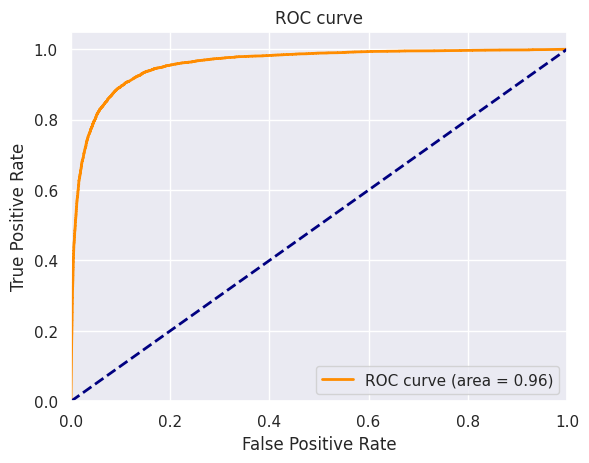

auc value
0.9587900207545818


In [42]:
print("roc analysis of test dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

roc analysis of validation dataset


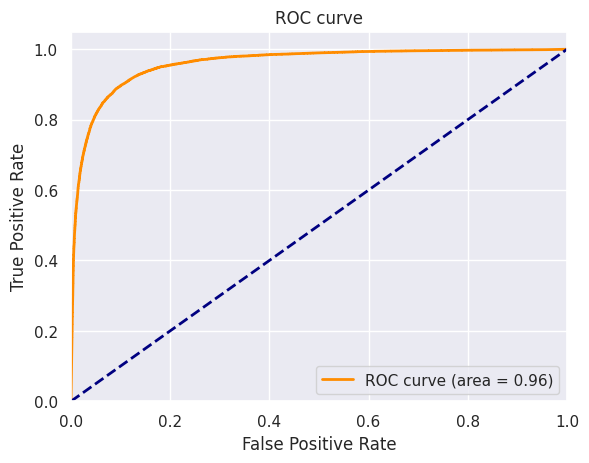

auc value
0.9598651775014617


In [43]:
print("roc analysis of validation dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val2_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

3455/3455 [==============================] - 88s 25ms/step
validation auc
0.8956892829022094
validation roc


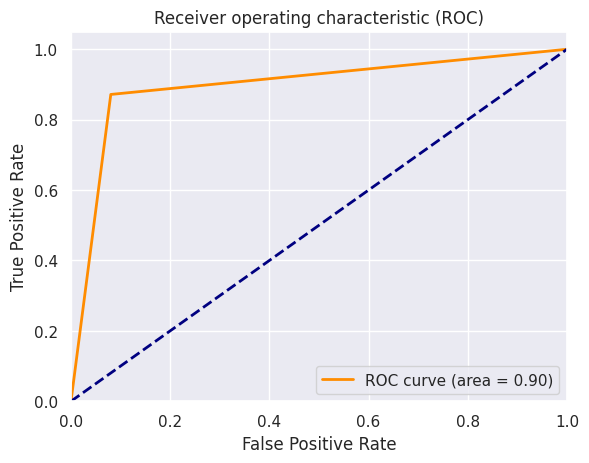

In [44]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras= model1.predict_generator(val2_generator,verbose=1)
#.ravel()
y_pred_keras=np.argmax(y_pred_keras,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

val_label2=np.argmax(val_label, axis=1)
#print(test_label2)
#print(len(test_label2))

#fpr_keras, tpr_keras, thresholds_keras = roc_curve(val_label2, y_pred_keras)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(val_label2, y_pred_keras
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("validation auc")
print(roc_auc)

print("validation roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

1525/1525 [==============================] - 39s 26ms/step
test auc
0.8930378368213324
test roc


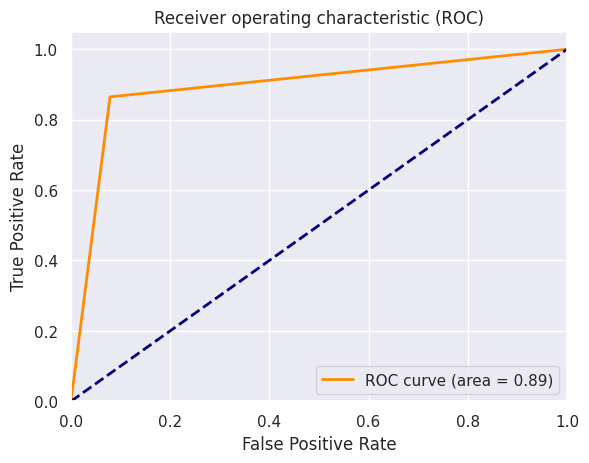

In [45]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras2= model1.predict_generator(val_generator,verbose=1)
#.ravel()
y_pred_keras2=np.argmax(y_pred_keras2,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

test_label2=np.argmax(test_label, axis=1)
#print(test_label2)
#print(len(test_label2))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label2, y_pred_keras2)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_label2, y_pred_keras2
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("test auc")
print(roc_auc)
print("test roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [46]:
'''

#must use train_label1 as train_label went through a shuffle in image-data-generator
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label1, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])
               '''

"\n\n#must use train_label1 as train_label went through a shuffle in image-data-generator\ntest_final_model(best_model, train_generator, \n               val_generator, val2_generator, \n               np.argmax(train_label1, axis=1),\n               np.argmax(test_label, axis=1),\n               np.argmax(val_label, axis=1), \n               class_labels = ['idc-', 'idc+'])\n               "

# Plotting EpochPlot

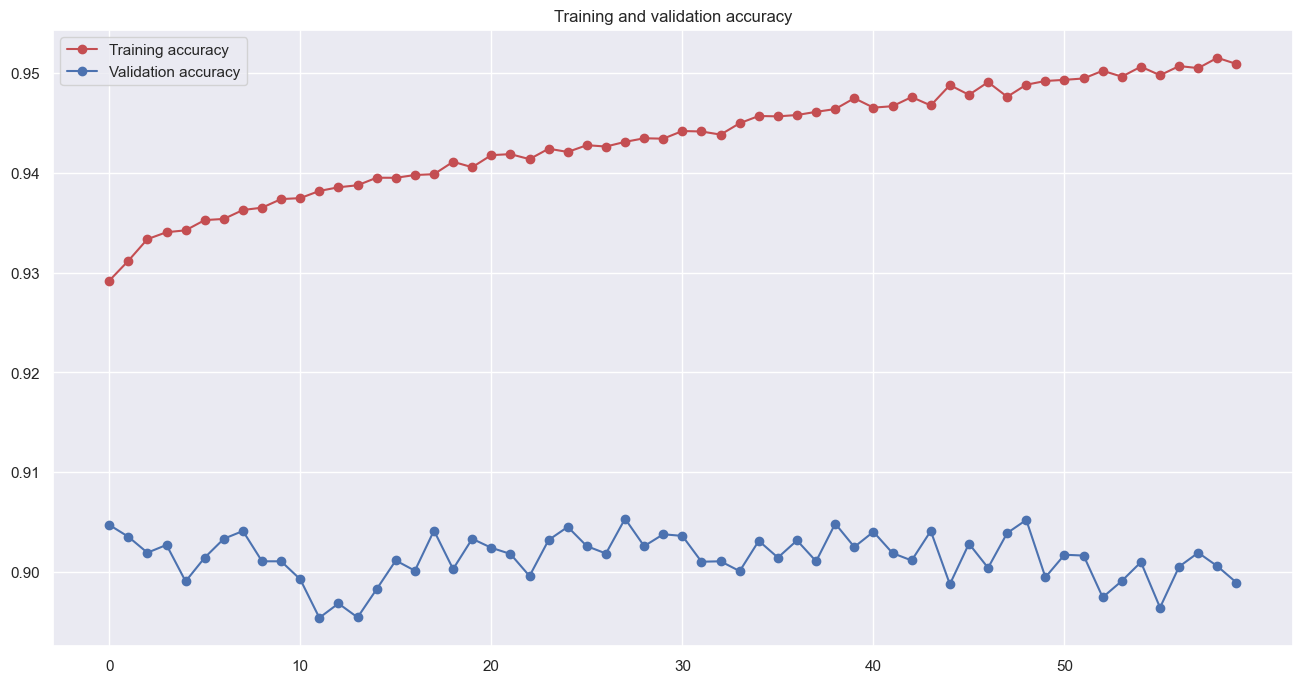

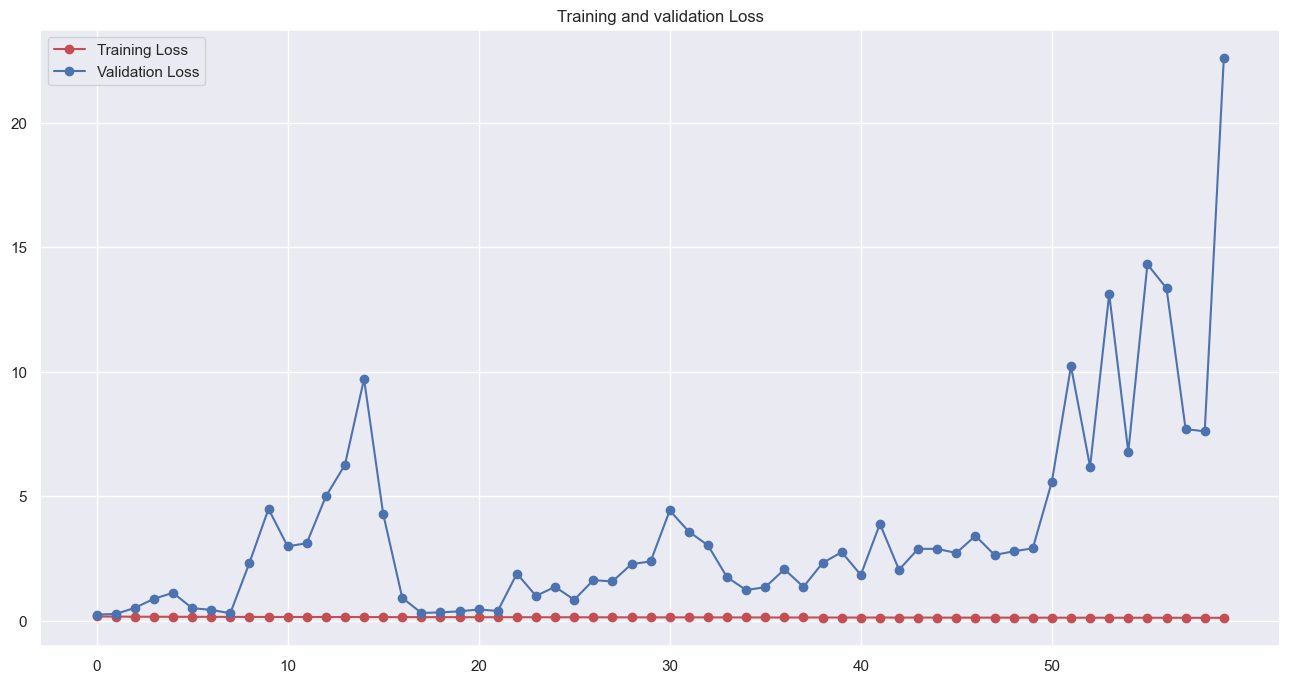

<Figure size 640x480 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [ ]:
#print(y_test)

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....